# Plotting Corona virus

Er zijn verschillende websites die visualisaties maken van het corona virus. Een bekende is 

https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6

Maar hoe wordt die gemaakt? In dit notebook kijken we naar verschillende visualisaties van het virus. Data kun je vinden op 

https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplleaflet
import warnings
from matplotlib.ticker import NullFormatter
from matplotlib.dates import MonthLocator, DateFormatter
import geopandas as gpd

## Lees de data

Allereerst lezen we de data. De data is in csv format op het internet. Als we de url opgeven inclusief de naam van het bestand kan pandas dat inlezen. 


In [2]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-11-2020.csv"
data = pd.read_csv(url)
data.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-11T10:53:02,67773,3046,49134,30.9756,112.2707
1,NaN,Italy,2020-03-11T21:33:02,12462,827,1045,43.0000,12.0000
2,NaN,Iran,2020-03-11T18:52:03,9000,354,2959,32.0000,53.0000
3,NaN,"Korea, South",2020-03-11T21:13:18,7755,60,288,36.0000,128.0000
4,France,France,2020-03-11T22:53:03,2281,48,12,46.2276,2.2137


## Plotten geomap

De data bevat geometrische data (locatie longitude en latitude) en data over aantallen. Dit gaan we gebruiken voor een geop visualisatie met geopandas. De wereldkaart zelf halen we ook uit geopandas

In [3]:
#lat = np.array(data['Latitude'])
#long = np.array(data['Longitude'])
#size = np.array(data['Confirmed'])
#zipped = zip(long, lat, size)

In [4]:
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

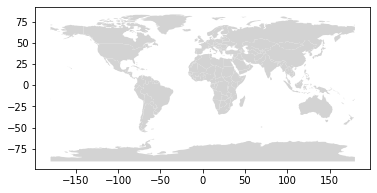

In [5]:
countries.plot(color="lightgrey")

Om de data over elkaar heen te plotten gebruiken we het principe van meerdere objecten op de canvas (figure, ax)

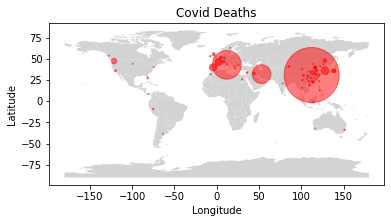

In [6]:
# initialize an axis
fig, ax = plt.subplots()
# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))

countries.plot(color="lightgrey", ax=ax)
# plot points
data.plot(x="Longitude", y="Latitude", kind="scatter", 
        color = 'red', s="Deaths", alpha=0.5,
        ax=ax, title = "Covid Deaths")
plt.show()# initialize an axis


Dit is natuurlijk een interessante visualisatie maar er is nog veel meer te inspecteren. 

## Opdracht plotjes

maak een violin plot van een variable van 4 landen. Hints: kijk bij https://fennaf.gitbook.io/dataprocessing/data-inspection/melt

In [ ]:
#Your code here

## Time series
Laten we eens naar de time series data kijken

In [7]:
#Allereerst laden we de data

In [8]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
data_t = pd.read_csv(url)
data_t.iloc[197:199]


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21
197,NaN,Netherlands,52.1326,5.2913,0,0,0,0,0,0,...,1991628,1993309,1994901,1996498,1997885,1999592,2001347,2003050,2004763,2006421
198,Cook Islands,New Zealand,-21.2367,-159.7777,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [9]:
data_t.index = data_t['Country/Region']
data_t = data_t.drop('Province/State', axis = 1)
data_t = data_t.drop('Country/Region', axis = 1)
data_t = data_t.drop('Lat', axis = 1)
data_t = data_t.drop('Long', axis = 1)
data_t.iloc[197]

1/22/20          0
1/23/20          0
1/24/20          0
1/25/20          0
1/26/20          0
            ...   
9/28/21    1999592
9/29/21    2001347
9/30/21    2003050
10/1/21    2004763
10/2/21    2006421
Name: Netherlands, Length: 620, dtype: int64

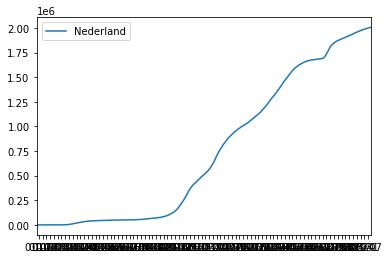

In [10]:
# dan laden we x en y
import matplotlib.pyplot as plt
import warnings

from matplotlib.ticker import NullFormatter
from matplotlib.dates import DateFormatter

x = data_t.columns.values.tolist()
nl= np.array(data_t.iloc[197])
plt.plot(x, nl, label="Nederland")
plt.legend()

ax = plt.gca()
ax.set_xlim([1.0, len(x)])

import matplotlib.dates as mdates
days = mdates.WeekdayLocator()
daysFmt = mdates.DateFormatter('%m-%d')
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)

plt.show()

# Opdracht
Maak de labels van de time series mooier. Plot ook Sweden

In [ ]:
#your code here